In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Convolution2D,Flatten,MaxPool2D
from keras.utils import np_utils

In [ ]:
ds = pd.read_csv("./dataset/train/fashion-mnist_train.csv")
print(ds.shape)

(60000, 785)


In [ ]:
ds.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X = ds.values[:,1:]/255.0  #rgb
y = np_utils.to_categorical(ds.values[:,0]) #a class vector to binary class matrix

print(X.shape,y.shape)

(60000, 784) (60000, 10)


In [ ]:
split = int(0.8*X.shape[0]) # %80 train, %20 test

X_train = X[:split].reshape((-1,28,28,1)) #train setinin Convolution2D girişine uygun olarak reshape edilmesi
y_train = y[:split]

X_test = X[split:].reshape((-1,28,28,1)) #test setinin Convolution2D girişine uygun olarak reshape edilmesi
y_test = y[split:]


print(X_train.shape,y_test.shape)

(48000, 28, 28, 1) (12000, 10)


In [ ]:
smodel = Sequential()
model.add(Convolution2D(32,(3,3),input_shape = (28,28,1)))
model.add(Activation('relu'))

model.add(Convolution2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 64)       

In [ ]:
hist = model.fit(X_train,y_train,
                epochs=100,
                shuffle=True,
                batch_size=400,
                validation_data=(X_test,y_test))

Epoch 1/100
120/120 [==============================] - 99s 730ms/step - loss: 0.9820 - accuracy: 0.6598 - val_loss: 0.4068 - val_accuracy: 0.8598
Epoch 2/100
120/120 [==============================] - 75s 624ms/step - loss: 0.4263 - accuracy: 0.8441 - val_loss: 0.3439 - val_accuracy: 0.8775
Epoch 3/100
120/120 [==============================] - 67s 561ms/step - loss: 0.3506 - accuracy: 0.8744 - val_loss: 0.3007 - val_accuracy: 0.8935
Epoch 4/100
120/120 [==============================] - 69s 577ms/step - loss: 0.3092 - accuracy: 0.8865 - val_loss: 0.2825 - val_accuracy: 0.8992
Epoch 5/100
120/120 [==============================] - 69s 579ms/step - loss: 0.2751 - accuracy: 0.8992 - val_loss: 0.2603 - val_accuracy: 0.9097
Epoch 6/100
120/120 [==============================] - 68s 569ms/step - loss: 0.2542 - accuracy: 0.9076 - val_loss: 0.2512 - val_accuracy: 0.9091
Epoch 7/100
120/120 [==============================] - 71s 589ms/step - loss: 0.2360 - accuracy: 0.9135 - val_loss: 0.2501 -

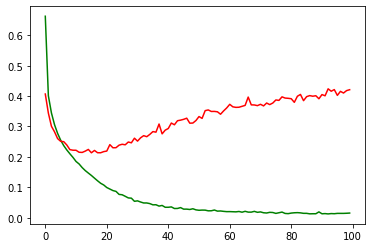

In [ ]:
history = hist.history

plt.figure(0)
plt.plot(history['loss'],'g')
plt.plot(history['val_loss'],'r')

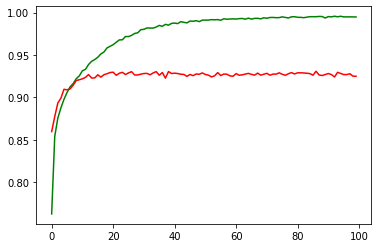

In [ ]:
plt.figure(1)
plt.plot(history['accuracy'],'g')
plt.plot(history['val_accuracy'],'r')